In [0]:
!pwd

/content


In [0]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
! pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-jroyy4bp
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-jroyy4bp
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4307 sha256=610112f23b49a0bffc9f8ca6de4bc8e5988fe4935636a98335e06e45c4142493
  Stored in directory: /tmp/pip-ephem-wheel-cache-f5yfb9wl/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [0]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 5.1MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 



  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4536912 sha256=fba46132be20135edb239251e87b156687058401e55b08f5169943adec8ba280
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.2-py2.py3-none-any.whl size=62338 sha256=a067e5ac9ca14e6515df91d2dc980b3335e28e4424d6d9a828d502dda4794e19
  Stored in directory: /root/.cache/pip/wheels/a7/d6/ac/03a67d071bde6d272d1f7c9ab7f4344fa9d7b9d98bda7fd127
Successfully built pycuda pytools


In [0]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [0]:
!pip install opencv-python

In [0]:
!ls src/

flower.png


In [0]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [0]:
import cv2 
import sys
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pycuda.driver as cuda
import pycuda.tools
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [0]:
img = cv2.imread('/content/src/flower.png')

In [0]:
type(img)

numpy.ndarray

In [0]:
img.shape

(200, 200, 3)

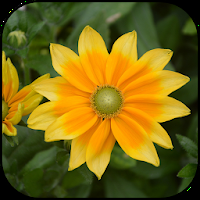

In [0]:
cv2_imshow(img)

In [0]:
img = img.astype(np.float32)
rows, cols,_ = img.shape

In [0]:
blue,green,red=cv2.split(img)

In [0]:
kernel = SourceModule("""
    #include <stdio.h>
    #include <stdlib.h>
    #include <string.h>
    #include <cuda.h>
    #include <cuda_runtime.h>

    __global__ void imageConvert(float *grey,float *d_red, float *d_green, float *d_blue){
        int tid = (blockIdx.x*(blockDim.x*blockDim.y)) + threadIdx.x;
        int i = tid/256;
        int j = tid%256;
        grey[i*256+j] = (0.21*d_red[i*256+j]+0.71*d_green[i*256+j]+0.07*d_blue[i*256+j]);
    }
    
    """)


GrayScale Image


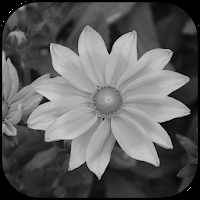

True

In [0]:
blockDim = (1024, 1, 1)
gridDim = (((rows*cols) // 1024) + 1, 1, 1)
imageConvert = kernel.get_function("imageConvert")
grey=green #sake of assigning
imageConvert(cuda.Out(grey), cuda.In(red), cuda.In(green),cuda.In(blue),block=blockDim, grid=gridDim)
print("GrayScale Image")
cv2_imshow(grey)

cv2.imwrite("/content/src/grayFlower.jpg", grey)

In [0]:
grey.shape

(200, 200)